In [1]:
import sys
sys.path.insert(0, '../../MultiOmic-NASA/tools/')
import utils as util


In [2]:
import utils as util
util.load()

import Abundence_analysis as Abundence_analysis
Abundence_analysis.load()

import pathlib as Path

data_path = Path.Path('../data/')
figs_path = Path.Path('../data/figures')

Loaded


In [5]:
simulation_df = util.make_simulation_df(10000)
display(simulation_df.sample(1))
abudence = Abundence_analysis.get_abudence(simulation_df, 'phenotype')
print(abudence)

,x,y,phenotype
112,29076,70944,B


A    33.40
C    33.39
B    33.21
Name: phenotype, dtype: float64


In [6]:
import pandas as pd
# create sample input and annotation dataframes
input_df = pd.DataFrame({'x': ['12', '12', '221', '53'], 'phenotype': ['A', 'B', 'C', 'D']})
annotation_df = pd.DataFrame({'PHENO': ['A', 'B', 'C', 'D'], 'level': ['a', 'b', 'c', 'd']})
display((annotation_df.sample(2)))
# call the function to replace phenotype annotations with levels
output_df = util.change_annotation(input_df, 'phenotype', annotation_df, 'PHENO', 'level')

# print the output dataframe
print(output_df)

,PHENO,level
0,A,a
3,D,d


     x phenotype
0   12         a
1   12         b
2  221         c
3   53         d


In [7]:
import importlib
import pandas as pd
importlib.reload(util)
simulation_modified = util.generalize_infrequent_phenotypes(simulation_df, annotation_df, 'phenotype', 'PHENO', 'level', threshold=0.05)

In [8]:
importlib.reload(util)
util.make_simulation_files(dir_path = '../data/sim', num_files = 150, min_rows = 5, max_rows = 100)
coords_files = util.coords_to_df('../data/sim')

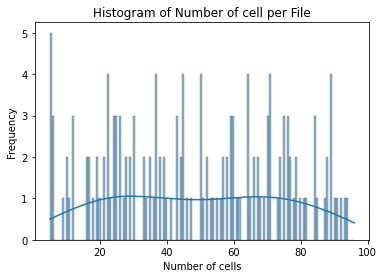

In [9]:
Abundence_analysis.QC_cell_count(coords_files, figs_path)



In [10]:
import os
import pandas as pd

# Define the directory path
in_path = data_path / 'sim'
out_path = Path.Path(data_path / 'ROIs' )

# Define the column name to filter on
column_name = 'ROIs'

importlib.reload(util)
util.split_DIR_roi( data_path/'sim', out_path = data_path/'ROIs' )



OSError: Cannot save file into a non-existent directory: '../data/ROIs'

In [ ]:
importlib.reload(Abundence_analysis)

<module 'Abundence_analysis' from '/home/mounim/CRCT-Projects/MultiOmic-NASA/example/../../MultiOmic-NASA/tools/Abundence_analysis.py'>

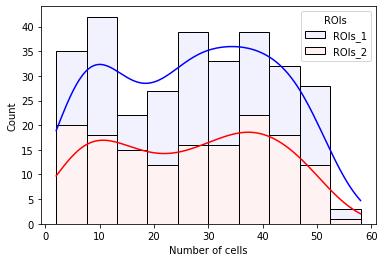

In [ ]:
coords_files = util.coords_to_df('../data/sim')
Abundence_analysis.hist_compare_ROIs(coords_files, figs_path)

In [ ]:
cell_count_by_ROIs = coords_files[['filename','phenotype','ROIs']].value_counts().reset_index()
cell_count_by_ROIs.sample()

,filename,phenotype,ROIs,0
273,simulated_99,A,ROIs_2,12


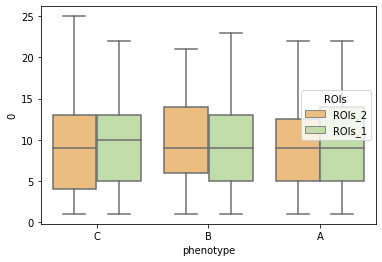

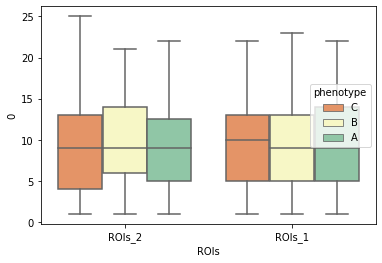

<Figure size 432x288 with 0 Axes>

In [ ]:
Abundence_analysis.hist_phenotype(coords_files, figs_path)


# Stat test
Cat x Cat: Chi sq
Num: t-test
Num x Cat: t-test / ANOVA
Num x Num: Correlation

In [ ]:
cell_count_by_ROIs.sample()

,filename,phenotype,ROIs,0
145,simulated_118,A,ROIs_1,15


In [ ]:

importlib.reload(util)

cat_cols = [ 'ROIs', 'phenotype']
num_cols = [0, 0]
signif_table = util.test_category_numeric( cell_count_by_ROIs, cat_cols, num_cols).reset_index()
display(signif_table)

,level_0,level_1,test_statistic,p_value
0,ROIs,0,-0.008196,0.993462
1,phenotype,0,0.078722,0.924304


In [ ]:
signif_data

,level_0,level_1,test_statistic,p_value
0,ROIs,0,-0.008196,0.993462
1,phenotype,0,0.078722,0.924304


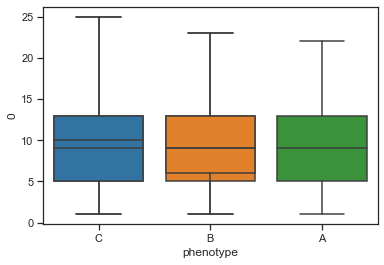

In [ ]:

threshold = 0.05
threshold = 1
import seaborn as sns
# Filter the significant p-values
plot = 'box'

importlib.reload(util)
util.plot_signif_cat_num(cell_count_by_ROIs, signif_table, threshold=1)


In [ ]:
importlib.reload(util)
# create a random dataframe with 3 numerical columns
df = pd.DataFrame(np.random.randn(100, 3), columns=['A', 'B', 'C'])
sign_table = util.test_significance_num(df, ['A', 'B', 'C'], test_name='t-test')
display(sign_table)

[['A', 'B', 0.4831330842927413, 0.057413741374137406, 0.5704509919095879, 0.035151515151515156, 0.6043240919115486], ['A', 'C', 0.6682514007946488, -0.033303330333033294, 0.7422029178921953, -0.024242424242424246, 0.7208118274690779], ['B', 'C', 0.9563878575232047, -0.04712871287128713, 0.6414869874603114, -0.03797979797979799, 0.5755572285803086]]


,Variable 1,Variable 2,Pearson_p,Spearman_rho,Spearman_p,Kendall_tau,Kendall_p
0,A,B,0.483133,0.057414,0.570451,0.035152,0.604324
1,A,C,0.668251,-0.033303,0.742203,-0.024242,0.720812
2,B,C,0.956388,-0.047129,0.641487,-0.037980,0.575557


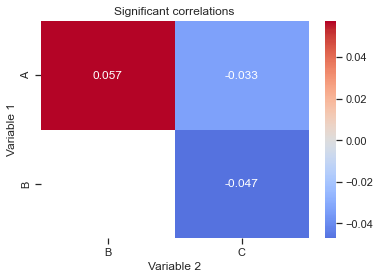

In [ ]:
importlib.reload(util)
util.plot_correlation_heatmap(sign_table,  alpha=1)

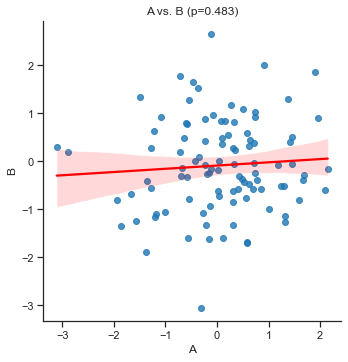

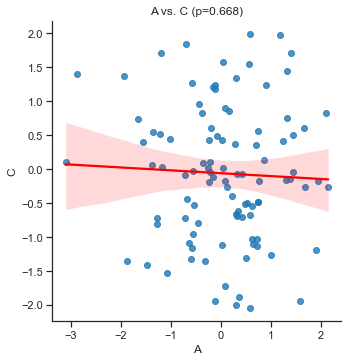

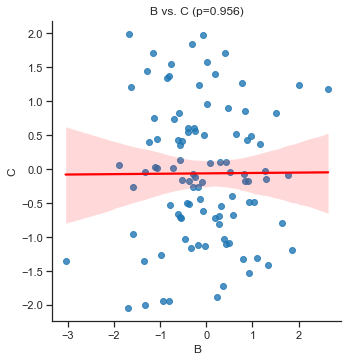

In [ ]:
import pandas as pd
import seaborn as sns
# from test_significance_num import test_significance_num

util.plot_correlations(df, sign_table, threshold=5)

In [ ]:
import numpy as np
import pandas as pd

# Generate simulated data
np.random.seed(123)
col1 = np.random.choice(['A', 'B', 'C'], size=100)
col2 = np.random.choice(['X', 'Y', 'Z'], size=100)
col3 = np.random.choice(['X', 'Y', 'Z'], size=100)

import pandas as pd
import scipy.stats as stats

df = pd.DataFrame({'A':col1,'B':col2,'C':col3})



In [ ]:
importlib. reload(util)
significance_df_cat = util.test_significance_cat(df , df.columns)
significance_df_cat

,Variable 1,Variable 2,P-Value
0,A,B,0.790019
1,A,C,0.221323
2,B,C,0.566625


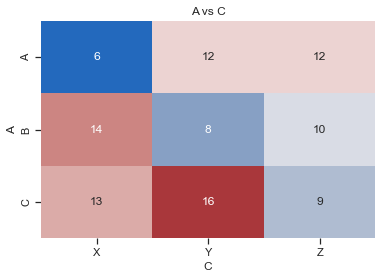

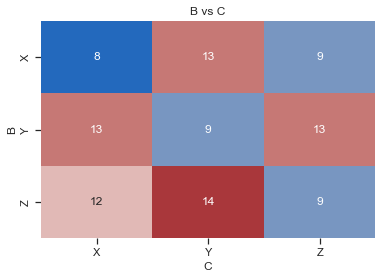

In [ ]:
util.plot_cat_diff(df, significance_df_cat, .59)

In [3]:
# ! pip install tysserand

# Network Analysis

In [ ]:
from tysserand import tysserand as ty
coords = util.make_simulation_df(1000)
coords['sample'] = 'XX'
coords.columns = ['Pos_X','Pos_Y','celltypes','sample']
coords.sample()

,Pos_X,Pos_Y,celltypes,sample
303,32342,40669,C,XX


In [ ]:
nodes = coords[['Pos_X','Pos_Y','celltypes']]
nodes.columns = ['x','y','class']
coordinates = nodes.loc[:,['x','y']].values

# TYSSERAND Function
pairs = ty.build_knn(coordinates, k=8)

# convert to df of pairs
edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
display(edges.sample())



,source,target
2624,343,816


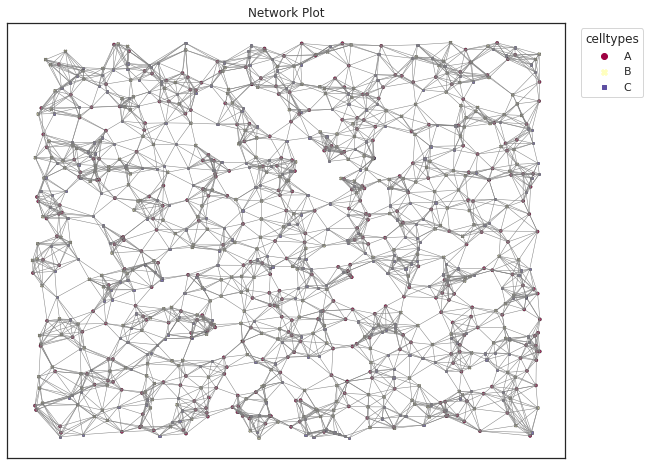

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import pandas as pd
import numpy as np

importlib.reload(util)
util.plot_network(coords, edges, 'celltypes',x = 'Pos_X', y='Pos_Y', size_nodes=10, cmap_nodes='Spectral', edges_color='gray')


In [5]:
from tysserand import tysserand as ty
import pandas as pd

In [6]:
coords = pd.read_csv('../../IMMUcan-Data/UPST-SCCHN3-1245-FIXT-01-IF3-01_#_cells_properties2_#_742c1339a592d54788ff12f05a0da107.tsv', sep = '\t')
coords['size'] = (coords['cell.area'] / 100 ).astype(int)
nodes = coords[['nucleus.x','nucleus.y','size']]
nodes.columns = ['x','y','class']
coordinates = nodes.loc[:,['x','y']].values


In [7]:

# # TYSSERAND Function
pairs = ty.build_knn(coordinates, k=8)

# # convert to df of pairs
edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
display(edges.sample())



,source,target
318550,71205,71358


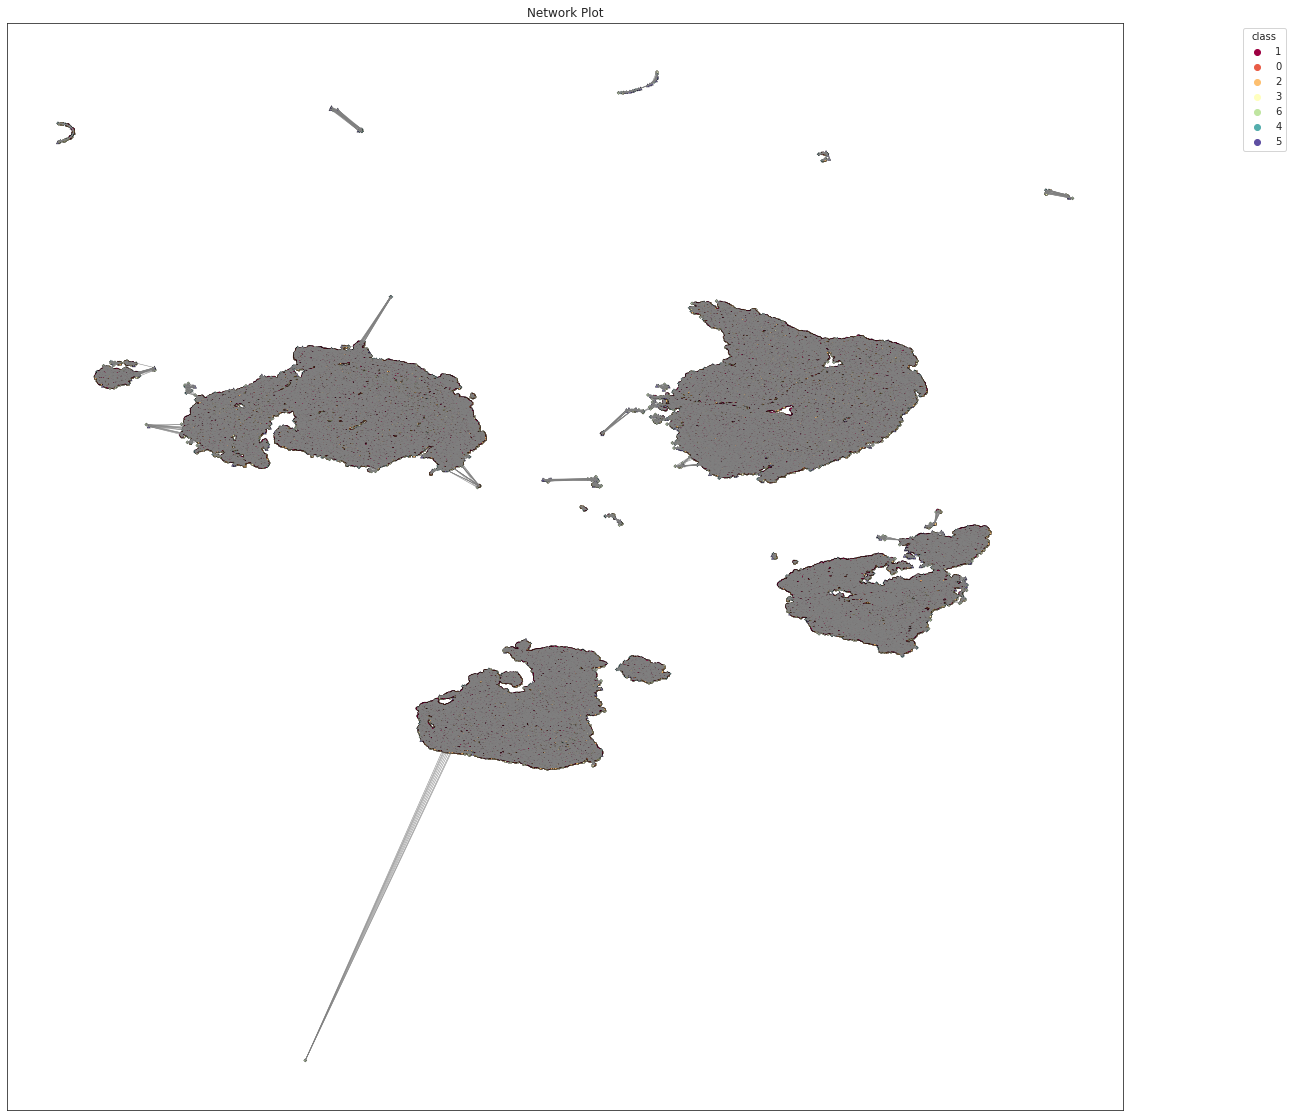

In [8]:

# importlib.reload(util)
util.plot_network(nodes, edges, 'class',x = 'x', y='y', size_nodes=10, cmap_nodes='Spectral', edges_color='gray', figureSize = [ 20,20])


,source,target,distance
2491,324,692,2924.041039


,source,target,distance
2615,342,855,3431.892335


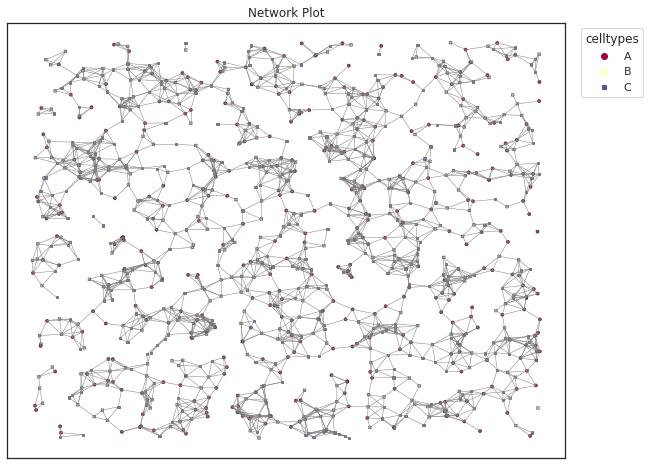

In [51]:
import pandas as pd
import numpy as np

def calculate_edges_dist(coords, edges, x = 'Pos_X', y = 'Pos_Y'):
    # Compute the distance between connected nodes
    distances = []
    for _, edge in edges.iterrows():
        source = edge['source']
        target = edge['target']
        source_coord = coords.loc[source, [x,y]].values
        target_coord = coords.loc[target, [x,y]].values
        distance = np.linalg.norm(target_coord - source_coord)
        distances.append(distance)

    # Add distances as a new column in the edges DataFrame
    edges['distance'] = distances
    return edges

def filter_edges_dist(edges, threshold_p = -1, threshold = 20, dist_col = 'distance'):
    """
    threshold (float): The threshold distance above which edges are removed.
    # threshold_p: threshold percentage of data
    # threshold: threshold value in micrometer
    """
    # Remove edges with a distance above the threshold
    if threshold_p > 0:
        threshold = df['values'].quantile(threshold_p)
    edges = edges[edges[dist_col] <= threshold]

    return edges

edges_d = calculate_edges_dist(coords, edges, x = 'Pos_X', y = 'Pos_Y')
display(edges_d.sample())
edges_f = filter_edges_dist(edges_d, threshold = 4600)
display(edges_f.sample())
util.plot_network(coords, edges_f, 'celltypes',x = 'Pos_X', y='Pos_Y', size_nodes=10, cmap_nodes='Spectral', edges_color='gray')



# Network Analysis
### Extract connected components

In [ ]:
import pandas as pd
import networkx as nx

# Create sample data
df = pd.DataFrame({'source': [1, 2, 3, 4, 5, 6], 'target': [2, 3, 4, 5, 6, 1]})

# Convert DataFrame to Graph object
G = nx.from_pandas_edgelist(df, source='source', target='target')

# Extract connected components
connected_components = list(nx.connected_components(G))

# Print the connected components
print(connected_components)
